In [73]:
import numpy as np
import pandas as pd
import os
import sys
from google.colab import drive
import matplotlib.pyplot as plt
import math
import itertools

import random
import seaborn as sns
LOOK_AT = 10
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [74]:
#mount google colab
drive.mount('/content/drive',force_remount = True) 

Mounted at /content/drive


In [75]:
full_music = pd.read_csv('/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/full_music_data.csv')

In [76]:
#full_music = full_music.groupby('artist_names').filter(lambda x : (x['artist_names'].count()>=100).any())

In [77]:
full_music['artist_names'].value_counts()

['Wolfgang Amadeus Mozart']        874
['Billie Holiday']                 684
['Frank Sinatra']                  677
['Vladimir Horowitz']              610
['Bob Dylan']                      539
                                  ... 
['Van der Graaf Generator']          1
['Black Uhuru', 'Sly & Robbie']      1
['Tommy James']                      1
['Michael English']                  1
['The Receiving End of Sirens']      1
Name: artist_names, Length: 7469, dtype: int64

In [78]:
full_music.shape

(98340, 19)

In [79]:
full_music.columns

Index(['artist_names', 'artists_id', 'danceability', 'energy', 'valence',
       'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness',
       'liveness', 'speechiness', 'explicit', 'duration_ms', 'popularity',
       'year', 'release_date', 'song_title (censored)'],
      dtype='object')

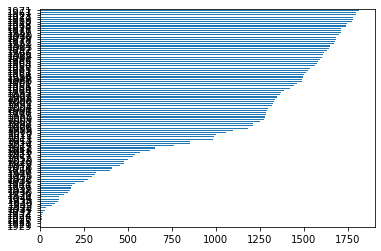

In [80]:
full_music.year.value_counts().sort_values().plot(kind = 'barh')

In [81]:
full_music.year.value_counts()
full_music['year'] = full_music['year'].astype(int)

In [82]:
"""del full_music['artist_names']  #useless 
del full_music['artists_id'] #useless 
del full_music['song_title (censored)']  #text column. 
del full_music['release_date'] #this column requires a lot of clening and it is redundant.  """

"del full_music['artist_names']  #useless \ndel full_music['artists_id'] #useless \ndel full_music['song_title (censored)']  #text column. \ndel full_music['release_date'] #this column requires a lot of clening and it is redundant.  "

In [83]:
full_music['tempo']

0        130.046
1        119.620
2        139.385
3        104.773
4        115.078
          ...   
98335     80.475
98336    109.847
98337    111.544
98338    161.548
98339    145.652
Name: tempo, Length: 98340, dtype: float64

In [84]:

# scale some parameter in the raw dataset to [0, 1]
import pandas as pd
from sklearn import preprocessing
parameter_columns = ['tempo','key', 'loudness', 'duration_ms','popularity']

min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(full_music[parameter_columns])
full_music[[parameter for parameter in parameter_columns]] = scaled

In [85]:
full_music['tempo']

0        0.532777
1        0.490063
2        0.571037
3        0.429237
4        0.471455
           ...   
98335    0.329693
98336    0.450025
98337    0.456977
98338    0.661835
98339    0.596712
Name: tempo, Length: 98340, dtype: float64

prepare the subdataframes on time intervals (decades) 

# TOPIC1 : PART1 

Divide the time (from 1950 to 2010) with decades interval, conduct a feature importance
analysis by XGboosting or other related machine learning algorithms for each period time and 
Visualize the results

In [86]:
mask_1950 =(full_music['year'] >= 1950) & (full_music['year'] <= 1960)
df_1950 = full_music.loc[mask_1950]
#del df_1950['year']

mask_1960 =(full_music['year'] > 1960) & (full_music['year'] <= 1970)
df_1960 = full_music.loc[mask_1960]
#del df_1960['year']

mask_1970 =(full_music['year'] > 1970) & (full_music['year'] <= 1980)
df_1970 = full_music.loc[mask_1970]
#del df_1970['year']

mask_1980 =(full_music['year'] > 1980) & (full_music['year'] <= 1990)
df_1980 = full_music.loc[mask_1980]
#del df_1980['year']

mask_1990 =(full_music['year'] > 1990) & (full_music['year'] <= 2000)
df_1990 = full_music.loc[mask_1990]
#del df_1990['year']

mask_2000 =(full_music['year'] > 2000) & (full_music['year'] <= 2010)
df_2000 = full_music.loc[mask_2000]
#del df_2000['year']

#this is for part 2 of the topic 1  ; Will only focus on the timeframe from 1990 - 2020
mask_2020 =(full_music['year'] > 1990) & (full_music['year'] <= 2020)
df_2020 = full_music.loc[mask_2020]


In [87]:
df_1950.shape

(11823, 19)

In [88]:
df_1950.head(3)

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
13,"[""Anita O'Day"", 'Roy Eldridge']","[479028, 346637]",0.514,0.327,0.602,0.517106,0.777767,1,0.727273,0.841,0.001270,0.0717,0.0366,0,0.059997,0.11,1956,1/1/1956,Boogie *****
14,"[""Anita O'Day"", 'Roy Eldridge']","[479028, 346637]",0.547,0.394,0.539,0.522748,0.775116,1,0.545455,0.724,0.000113,0.0789,0.0511,0,0.055246,0.09,1956,1/1/1956,Opus *
17,"[""Anita O'Day"", 'Roy Eldridge']","[479028, 346637]",0.519,0.345,0.535,0.546235,0.792106,1,0.727273,0.804,0.000000,0.0739,0.0386,0,0.052185,0.14,1956,1/1/1956,Let Me *** Uptown


In [89]:
X_1950 =df_1950.iloc[:, 2: 15]
Y_1950 =df_1950['popularity']

X_1960 =df_1960.iloc[:, 2: 15]
Y_1960 =df_1960['popularity']

X_1970 =df_1970.iloc[:, 2: 15]
Y_1970 =df_1970['popularity']

X_1980 =df_1980.iloc[:, 2: 15]
Y_1980 =df_1980['popularity']

X_1990 =df_1990.iloc[:,2: 15]
Y_1990 =df_1990['popularity']

X_2000 =df_2000.iloc[:, 2: 15]
Y_2000 =df_2000['popularity']


In [90]:
from xgboost import XGBClassifier 
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure

classifier = XGBClassifier() 

# FOR 1950-1960

[0.07867603 0.07613607 0.08373853 0.07271047 0.08334073 0.06952001
 0.06648915 0.1198737  0.08620995 0.07757334 0.09278231 0.
 0.09294968]


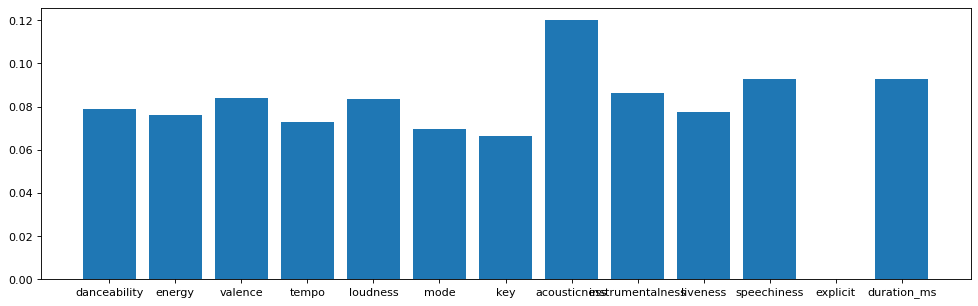

In [91]:
classifier.fit(X_1950, Y_1950) 
print(classifier.feature_importances_)
figure(figsize=(15, 4.5), dpi=80,)
plt.bar(X_1950.columns,classifier.feature_importances_)
plt.show()

# FOR 1960-1970

[0.07537512 0.07678875 0.07886676 0.06742205 0.07832497 0.0701765
 0.07078192 0.08997238 0.07725052 0.07309403 0.07439563 0.08626238
 0.081289  ]


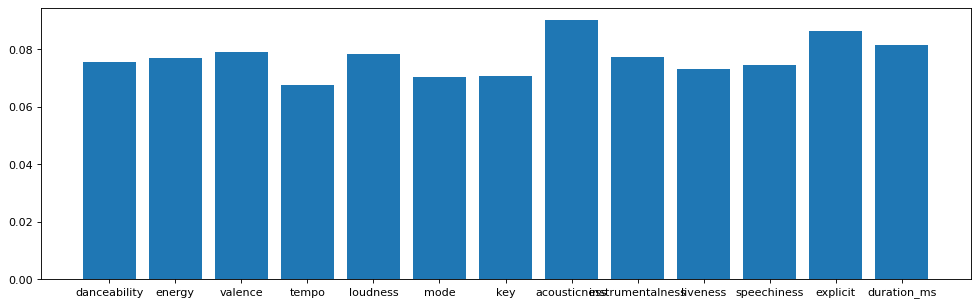

In [92]:
classifier.fit(X_1960, Y_1960) 
print(classifier.feature_importances_)
figure(figsize=(15, 4.5), dpi=80,)
plt.bar(X_1960.columns,classifier.feature_importances_)
plt.show()

# FOR 1970-1980

[0.07949176 0.07852682 0.07807948 0.07582068 0.07604334 0.06089677
 0.07021946 0.07808462 0.08095186 0.07963704 0.07071497 0.09290096
 0.07863224]


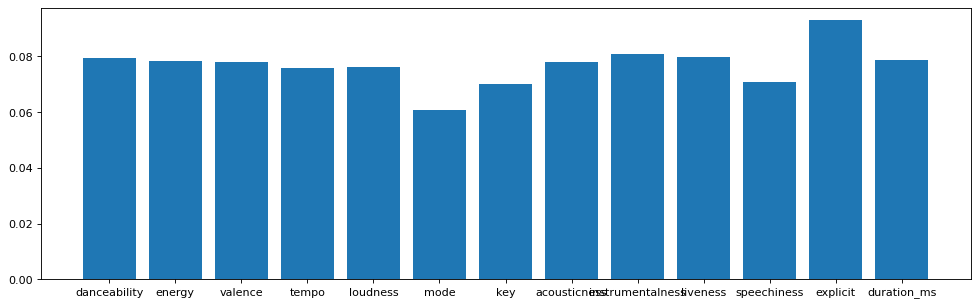

In [93]:
classifier.fit(X_1970, Y_1970) 
print(classifier.feature_importances_)
figure(figsize=(15, 4.5), dpi=80,)
plt.bar(X_1970.columns,classifier.feature_importances_)
plt.show()

# FOR 1980-1990

[0.07639185 0.08273598 0.07468536 0.07693252 0.07576115 0.08676294
 0.07217345 0.08440129 0.08573989 0.07707193 0.07572213 0.04860315
 0.08301836]


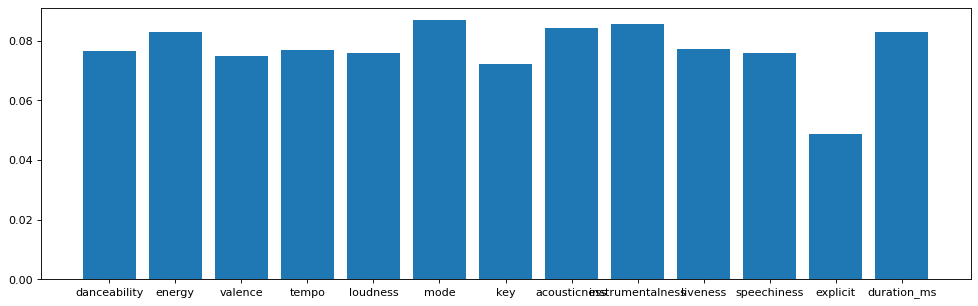

In [94]:
classifier.fit(X_1980, Y_1980) 
print(classifier.feature_importances_)
figure(figsize=(15, 4.5), dpi=80,)
plt.bar(X_1980.columns,classifier.feature_importances_)
plt.show()

# FOR 1990-2000

[0.07817536 0.08316552 0.07972116 0.0754107  0.08018462 0.07851139
 0.06938706 0.08319696 0.08087679 0.07743376 0.07369792 0.06062194
 0.07961687]


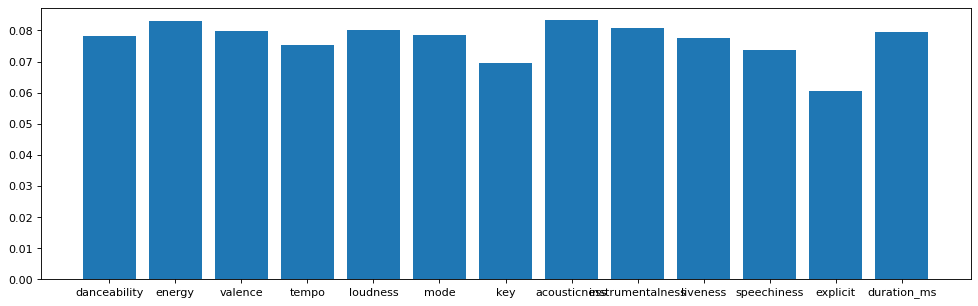

In [95]:
classifier.fit(X_1990, Y_1990) 
print(classifier.feature_importances_)
figure(figsize=(15, 4.5), dpi=80,)
plt.bar(X_1990.columns,classifier.feature_importances_)
plt.show()

# FOR 2000-2010

[0.07424283 0.08600743 0.07793695 0.08216522 0.08438815 0.0691037
 0.07001324 0.08236006 0.0810634  0.07346563 0.07464506 0.05796226
 0.08664615]


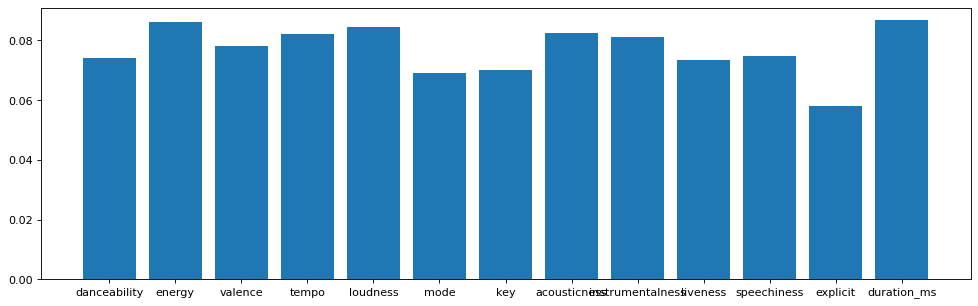

In [96]:
classifier.fit(X_2000, Y_2000) 
print(classifier.feature_importances_)
figure(figsize=(15, 4.5), dpi=80,)
plt.bar(X_2000.columns,classifier.feature_importances_)
plt.show()

we will save a copy of the new dataframe df_2020 because of memeory issues (the sessions crashs) , we can't run the topic1-2 part here. 

In [97]:
# e.g. save pandas output as csv
df_2020.to_csv('df_2020.csv')

!cp df_2020.csv "/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/"
